#Neccesary Imports

In [ ]:
%cd '/content/drive/MyDrive/Image Processing Project/Test Images'

/content/drive/MyDrive/Image Processing Project/Test Images


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Visualization of Images

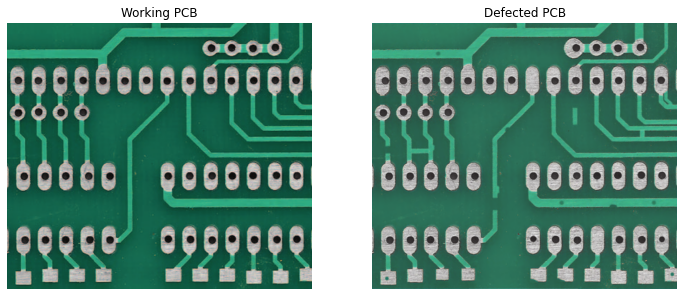

In [ ]:
test_img = cv.imread('test.png')
template_img = cv.imread('template.png')

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(cv.cvtColor(template_img, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Working PCB')

ax[1].imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('Defected PCB')

#Analysis of Image Histogram

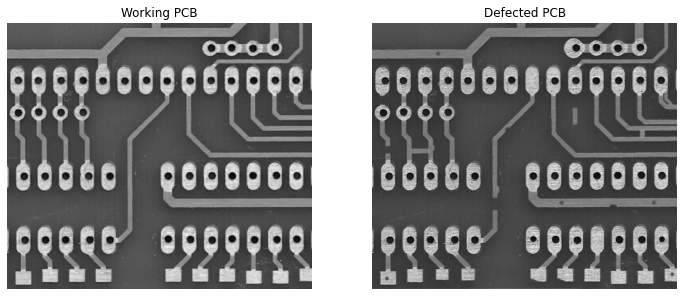

In [ ]:
gray_test_img = cv.cvtColor(test_img,cv.COLOR_BGR2GRAY)
gray_template_img = cv.cvtColor(template_img,cv.COLOR_BGR2GRAY)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(gray_template_img,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Working PCB')

ax[1].imshow(gray_test_img,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Defected PCB')

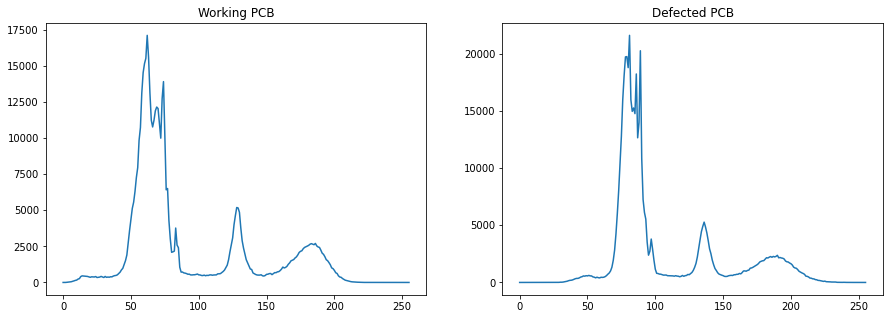

In [ ]:
hist_test = cv.calcHist([gray_test_img],[0],None,[256],[0,256])
hist_template = cv.calcHist([gray_template_img],[0],None,[256],[0,256])

f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(hist_template)
ax[0].title.set_text('Working PCB')

ax[1].plot(hist_test)
ax[1].title.set_text('Defected PCB')

###As we can see from the histograms plotted above that we can perform multi-level thresholding to perform image segmentation. But, first we need to remove noise and supress high-intensity variations within the image.


#Image Pre-Processing

###Removing salt and pepper noise using a median filter of kernel size 7x7

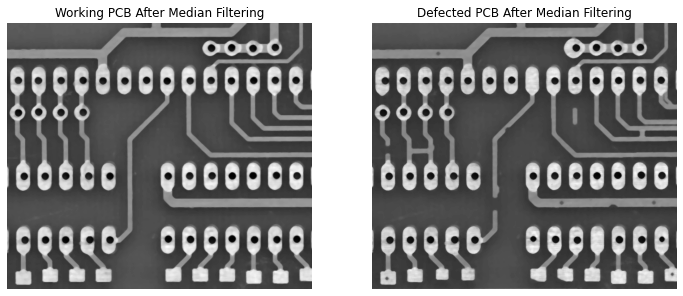

In [ ]:
med_test = cv.medianBlur(gray_test_img,7)
med_template = cv.medianBlur(gray_template_img,7)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(med_template,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Working PCB After Median Filtering')

ax[1].imshow(med_test,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Defected PCB After Median Filtering')

###Using Gaussian filter (sigma = 1) to supress high-intensity variations within the image

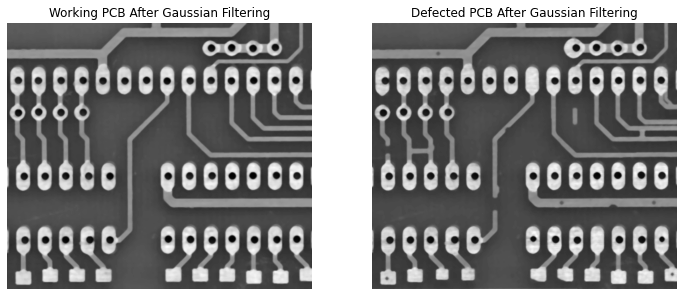

In [ ]:
gaus_test = cv.GaussianBlur(med_test,ksize=(3,3),sigmaX=1)
gaus_template = cv.GaussianBlur(med_template,ksize=(3,3),sigmaX=1)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(gaus_template,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Working PCB After Gaussian Filtering')

ax[1].imshow(gaus_test,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Defected PCB After Gaussian Filtering')

###As the pre-processing of the images is done now, we can move on to segmenting different parts in the image.

#Image Segmentation

###There are multiple parts in the PCB images considered:

###1.   Soldering Pads
###2.   Wire Tracks
###3.   Image Background

###These can be segmented by performing multi-level thresholding on the image.

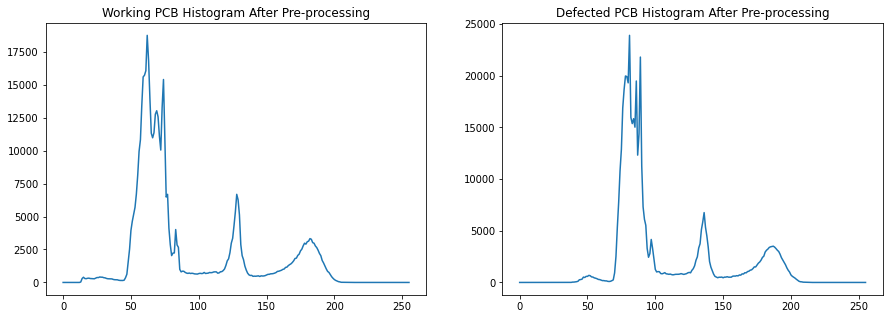

In [ ]:
hist_blur_test = cv.calcHist([gaus_test],[0],None,[256],[0,256])
hist_blur_template = cv.calcHist([gaus_template],[0],None,[256],[0,256])

f, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(hist_blur_template)
ax[0].title.set_text('Working PCB Histogram After Pre-processing')

ax[1].plot(hist_blur_test)
ax[1].title.set_text('Defected PCB Histogram After Pre-processing')

###Notice that the histogram has 3 peaks. Looking at the Image we can tell that the image has intensity as follows:
###Soldering Pads Intensity > Wire Tracks Intensity > Background Intensity

###1. Soldering Pads Segmentation

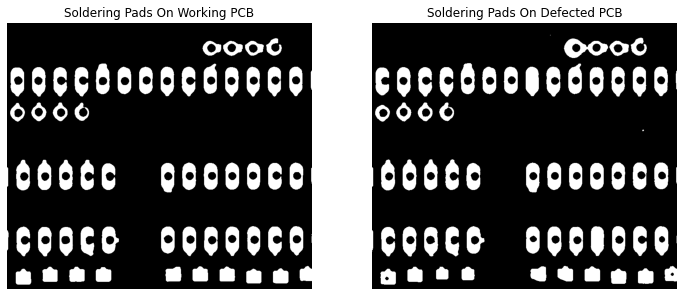

In [ ]:
sold_test = cv.inRange(gaus_test,145,255)
sold_template = cv.inRange(gaus_template,140,255)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(sold_template,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Soldering Pads On Working PCB')

ax[1].imshow(sold_test,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Soldering Pads On Defected PCB')

###2. Wire Tracks Segmentation

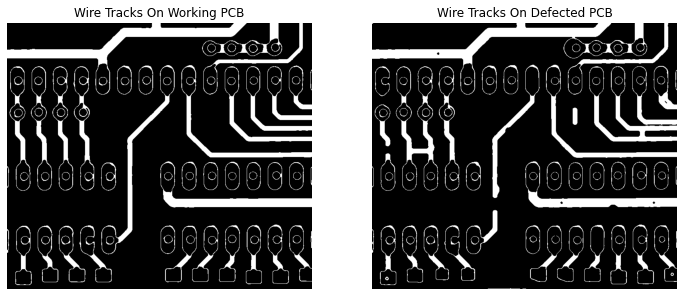

In [ ]:
wire_test = cv.inRange(gaus_test,105,150)
wire_template = cv.inRange(gaus_template,95,145)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(wire_template,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Wire Tracks On Working PCB')

ax[1].imshow(wire_test,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Wire Tracks On Defected PCB')

###The wire tracks image has some parts from the soldering pads, so to remove the soldering pads noise we perform opening operation on the image with a kernel of size 7x7

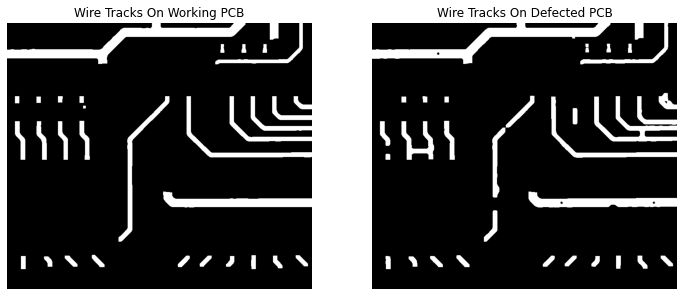

In [ ]:
kernel = np.ones((7,7))
open_wire_test = cv.morphologyEx(wire_test, cv.MORPH_OPEN, kernel)
open_wire_template = cv.morphologyEx(wire_template, cv.MORPH_OPEN, kernel)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(open_wire_template,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Wire Tracks On Working PCB')

ax[1].imshow(open_wire_test,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Wire Tracks On Defected PCB')

###3. Background Image

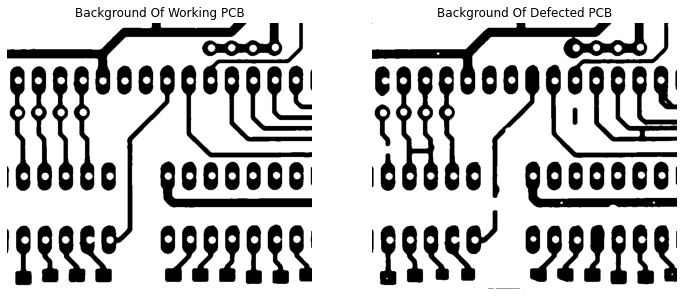

In [ ]:
bg_test = cv.inRange(gaus_test,0,105)
bg_template = cv.inRange(gaus_template,0,95)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(bg_template,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Background Of Working PCB')

ax[1].imshow(bg_test,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Background Of Defected PCB')

### Segmentation Results

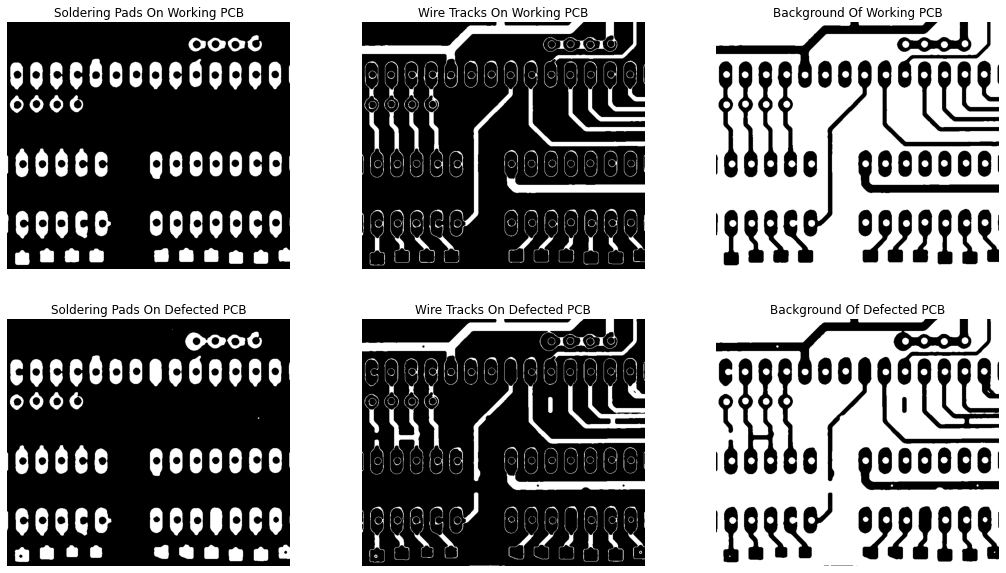

In [ ]:
f, ax = plt.subplots(2,3,figsize=(18,10))

# Soldering pads
ax[0][0].imshow(sold_template,cmap='gray')
ax[0][0].axis('off')
ax[0][0].title.set_text('Soldering Pads On Working PCB')

ax[1][0].imshow(sold_test,cmap='gray')
ax[1][0].axis('off')
ax[1][0].title.set_text('Soldering Pads On Defected PCB')

#Wire Tracks
ax[0][1].imshow(wire_template,cmap='gray')
ax[0][1].axis('off')
ax[0][1].title.set_text('Wire Tracks On Working PCB')

ax[1][1].imshow(wire_test,cmap='gray')
ax[1][1].axis('off')
ax[1][1].title.set_text('Wire Tracks On Defected PCB')

#Background Image
ax[0][2].imshow(bg_template,cmap='gray')
ax[0][2].axis('off')
ax[0][2].title.set_text('Background Of Working PCB')

ax[1][2].imshow(bg_test,cmap='gray')
ax[1][2].axis('off')
ax[1][2].title.set_text('Background Of Defected PCB')

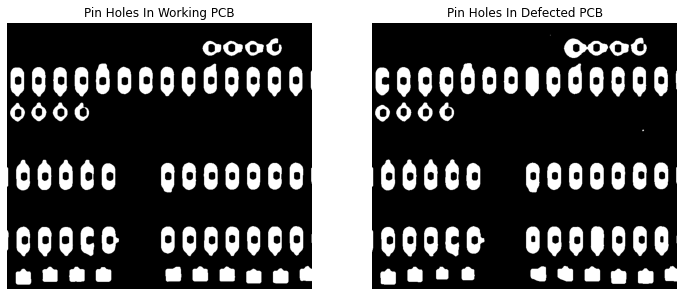

In [ ]:
kernel = np.ones((13,3))
close_sold_test = cv.morphologyEx(sold_test, cv.MORPH_CLOSE, kernel)
close_sold_template = cv.morphologyEx(sold_template, cv.MORPH_CLOSE, kernel)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(close_sold_template,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Pin Holes In Working PCB')

ax[1].imshow(close_sold_test,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Pin Holes In Defected PCB')

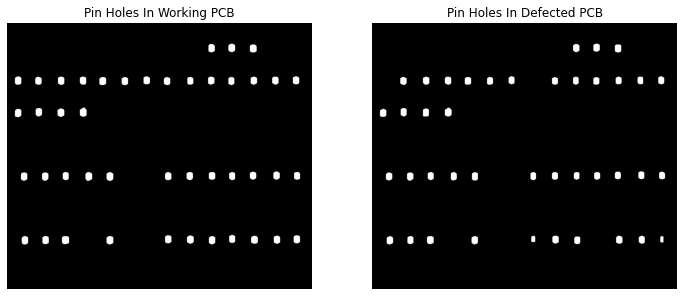

In [ ]:
sold_test_fill = close_sold_test.copy()
sold_template_fill = close_sold_template.copy()

h, w = sold_test_fill.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv.floodFill(sold_test_fill, mask, (0,0), 255);
hole_test = cv.bitwise_not(sold_test_fill)

h, w = sold_template_fill.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv.floodFill(sold_template_fill, mask, (0,0), 255);
hole_template = cv.bitwise_not(sold_template_fill)

f, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(hole_template,cmap='gray')
ax[0].axis('off')
ax[0].title.set_text('Pin Holes In Working PCB')

ax[1].imshow(hole_test,cmap='gray')
ax[1].axis('off')
ax[1].title.set_text('Pin Holes In Defected PCB')

#Defect Detection

###The segmented images (wiring tracks, soldering pads and holes) of test and template images differ from each other due to defects in testing PCB image. So, the defects can be simply detected by image subtraction.
###These defects are of two types:
###(1) positive defects (PD) and 
###(2) negative defects (ND)

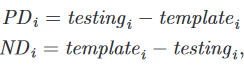

###Postive and Negative Defects in Soldering Pads

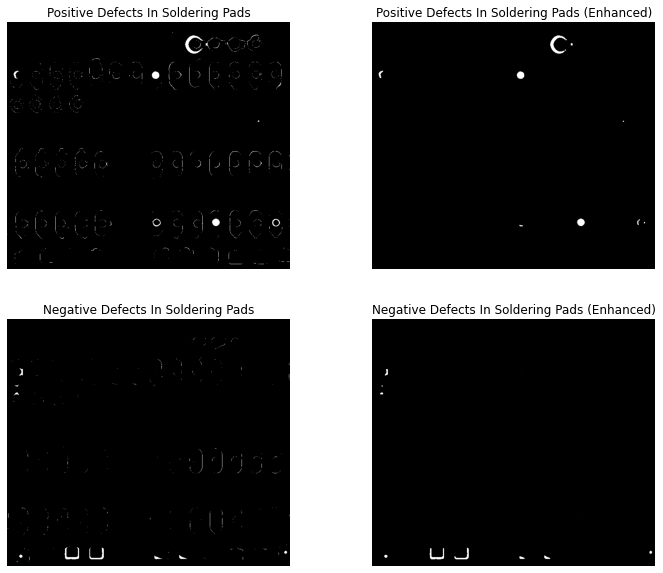

In [ ]:
pd_sold = sold_test - sold_template
nd_sold = sold_template - sold_test

kernel = np.ones((3,3))
open_pd_sold = cv.morphologyEx(pd_sold, cv.MORPH_OPEN, kernel)
open_nd_sold = cv.morphologyEx(nd_sold, cv.MORPH_OPEN, kernel)

f, ax = plt.subplots(2,2,figsize=(12,10))
ax[0][0].imshow(pd_sold,cmap='gray')
ax[0][0].axis('off')
ax[0][0].title.set_text('Positive Defects In Soldering Pads')

ax[1][0].imshow(nd_sold,cmap='gray')
ax[1][0].axis('off')
ax[1][0].title.set_text('Negative Defects In Soldering Pads')

ax[0][1].imshow(open_pd_sold,cmap='gray')
ax[0][1].axis('off')
ax[0][1].title.set_text('Positive Defects In Soldering Pads (Enhanced)')

ax[1][1].imshow(open_nd_sold,cmap='gray')
ax[1][1].axis('off')
ax[1][1].title.set_text('Negative Defects In Soldering Pads (Enhanced)')

###Postive and Negative Defects in Wire Tracks

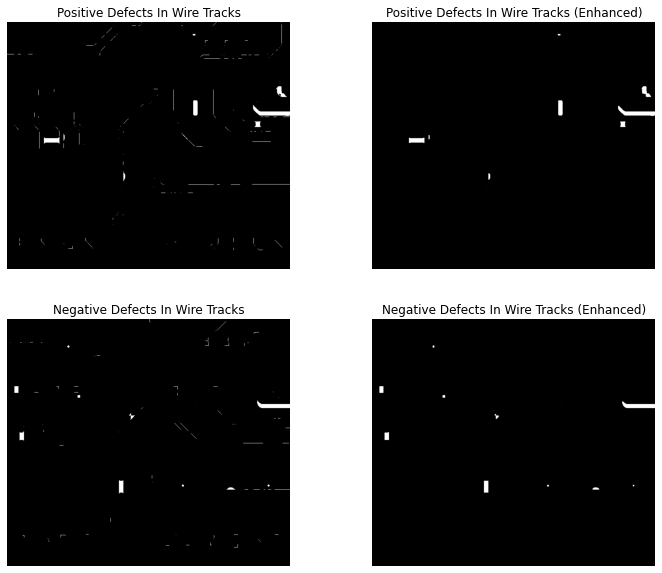

In [ ]:
pd_wire = open_wire_test - open_wire_template
nd_wire = open_wire_template - open_wire_test

kernel = np.ones((3,3))
open_pd_wire = cv.morphologyEx(pd_wire, cv.MORPH_OPEN, kernel)
open_nd_wire = cv.morphologyEx(nd_wire, cv.MORPH_OPEN, kernel)

f, ax = plt.subplots(2,2,figsize=(12,10))
ax[0][0].imshow(pd_wire,cmap='gray')
ax[0][0].axis('off')
ax[0][0].title.set_text('Positive Defects In Wire Tracks')

ax[1][0].imshow(nd_wire,cmap='gray')
ax[1][0].axis('off')
ax[1][0].title.set_text('Negative Defects In Wire Tracks')

ax[0][1].imshow(open_pd_wire,cmap='gray')
ax[0][1].axis('off')
ax[0][1].title.set_text('Positive Defects In Wire Tracks (Enhanced)')

ax[1][1].imshow(open_nd_wire,cmap='gray')
ax[1][1].axis('off')
ax[1][1].title.set_text('Negative Defects In Wire Tracks (Enhanced)')

###Postive and Negative Defects in Pin Holes

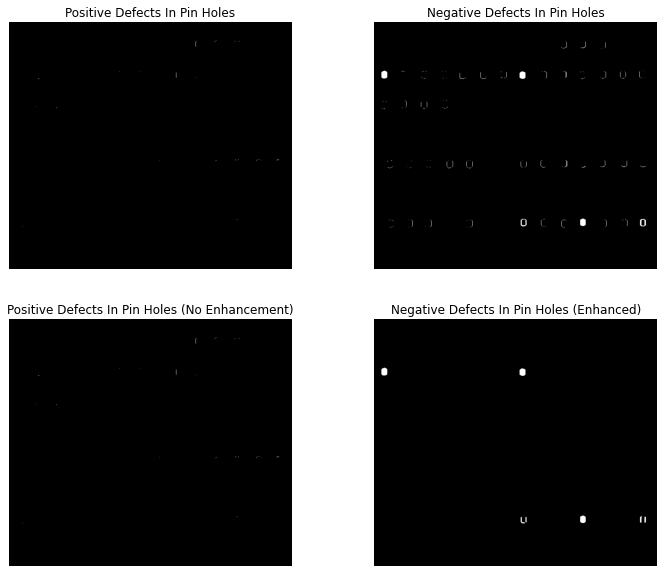

In [ ]:
pd_hole = hole_test - hole_template
nd_hole = hole_template - hole_test

kernel = np.ones((3,3))
open_nd_hole = cv.morphologyEx(nd_hole, cv.MORPH_OPEN, kernel)

f, ax = plt.subplots(2,2,figsize=(12,10))
ax[0][0].imshow(pd_hole,cmap='gray')
ax[0][0].axis('off')
ax[0][0].title.set_text('Positive Defects In Pin Holes')

ax[0][1].imshow(nd_hole,cmap='gray')
ax[0][1].axis('off')
ax[0][1].title.set_text('Negative Defects In Pin Holes')

ax[1][0].imshow(pd_hole,cmap='gray')
ax[1][0].axis('off')
ax[1][0].title.set_text('Positive Defects In Pin Holes (No Enhancement)')

ax[1][1].imshow(open_nd_hole,cmap='gray')
ax[1][1].axis('off')
ax[1][1].title.set_text('Negative Defects In Pin Holes (Enhanced)')

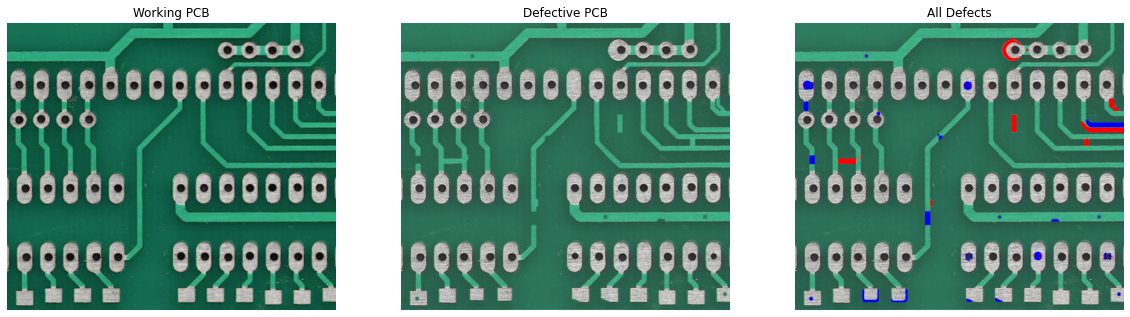

In [ ]:
defects = test_img.copy()

defects[open_pd_sold == 255] = [0, 0, 255]
defects[open_pd_wire == 255] = [0, 0, 255]
defects[pd_hole == 255] = [0, 0, 255]

defects[open_nd_sold == 255] = [255, 0, 0]
defects[open_nd_wire == 255] = [255, 0, 0]
defects[open_nd_hole == 255] = [255, 0, 0]

f, ax = plt.subplots(1,3,figsize=(20,10))

ax[0].imshow(cv.cvtColor(template_img,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Working PCB')

ax[1].imshow(cv.cvtColor(test_img,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('Defective PCB')

ax[2].imshow(cv.cvtColor(defects,cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].title.set_text('All Defects')

###The defects shown in the blue color represent negative defects while the defects shown in red color represent positive defects